# **Power Plant Project**

Contents

1.   Data Information
2.   Exploratory Data Analysis
     *   Include Libraries
     *   Import Data
     *   Explore Data
     *   Missing Values
3.   Data Visualization
     *   Distribution plot
     *   Pairplot
     *   BoxPlot
     *   Correlation
4.   Feature Engineering
     *   Splitting data
     *   Standardization
5.   Machine Learning Model
     *  Supervised Learning: Regression with a deep neural network (DNN)
6.  Results and conclusion
7.  References





# **1. Data Information**
`
The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables
`
* **Temperature (T)** in the range 1.81°C and 37.11°C.
* **Ambient Pressure (AP)**	in the range 992.89-1033.30 milibar.
* **Relative Humidity (RH)**  in the range 25.56% to 100.16%.
* **Exhaust Vacuum (V)**	 in teh range 25.36-81.56 cm Hg.
* **net hourly electrical energy output (EP)** 420.26-495.76 MW

The goal of this work is to estimate the net hourly electrical energy output (EP) of the plant.

# **2.  Exploratory Data Analysis**

## 2.1 Import Libraries

In [ ]:
# Import Libraries
# ==============================================================================
import numpy as np                                                              # linear algebra
import pandas as pd                                                             # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt                                                 # for data visualization
import seaborn as sns                                                           # Seaborn is a library for making statistical graphics in Python.
%matplotlib inline

## 2.2 Load Data

In [ ]:
data =pd.read_csv("cycle powerplant.csv")

## 2.3 Exploring Data

In [ ]:
# Shape of data
# ==============================================================================
data.shape

(9568, 5)

In [ ]:
# view the first 5  elements of data
# ==============================================================================
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
# Info of data
# ==============================================================================
data.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Rename columns
# ==============================================================================
data.columns=['AverageTemperature','ExhaustVacuum','AmbientPressure',
              'RelativeHumidity ','Net Hourly Electrical Energy']
data.head()

,AverageTemperature,ExhaustVacuum,AmbientPressure,RelativeHumidity,Net Hourly Electrical Energy
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## 2.4 Missing Values

In [ ]:
data.isnull().sum()

AverageTemperature              0
ExhaustVacuum                   0
AmbientPressure                 0
RelativeHumidity                0
Net Hourly Electrical Energy    0
dtype: int64

**Summary of Data Preprocesing** 

*   The data contains 9568 observations and 5 variables.
*   The data contains 5 numerical variables.
*   Our inputs or independent variable will be  `["Average Temperature", "Exhaust Vacuum", "Ambient Pressure", "Relative Humidity"]` , and our output or dependent variable will  be `"Net Hourly Electrical Energy"`
*   The data does not contain missing values




# **3.  Data Visualization**

## 3.1 Distribution plot

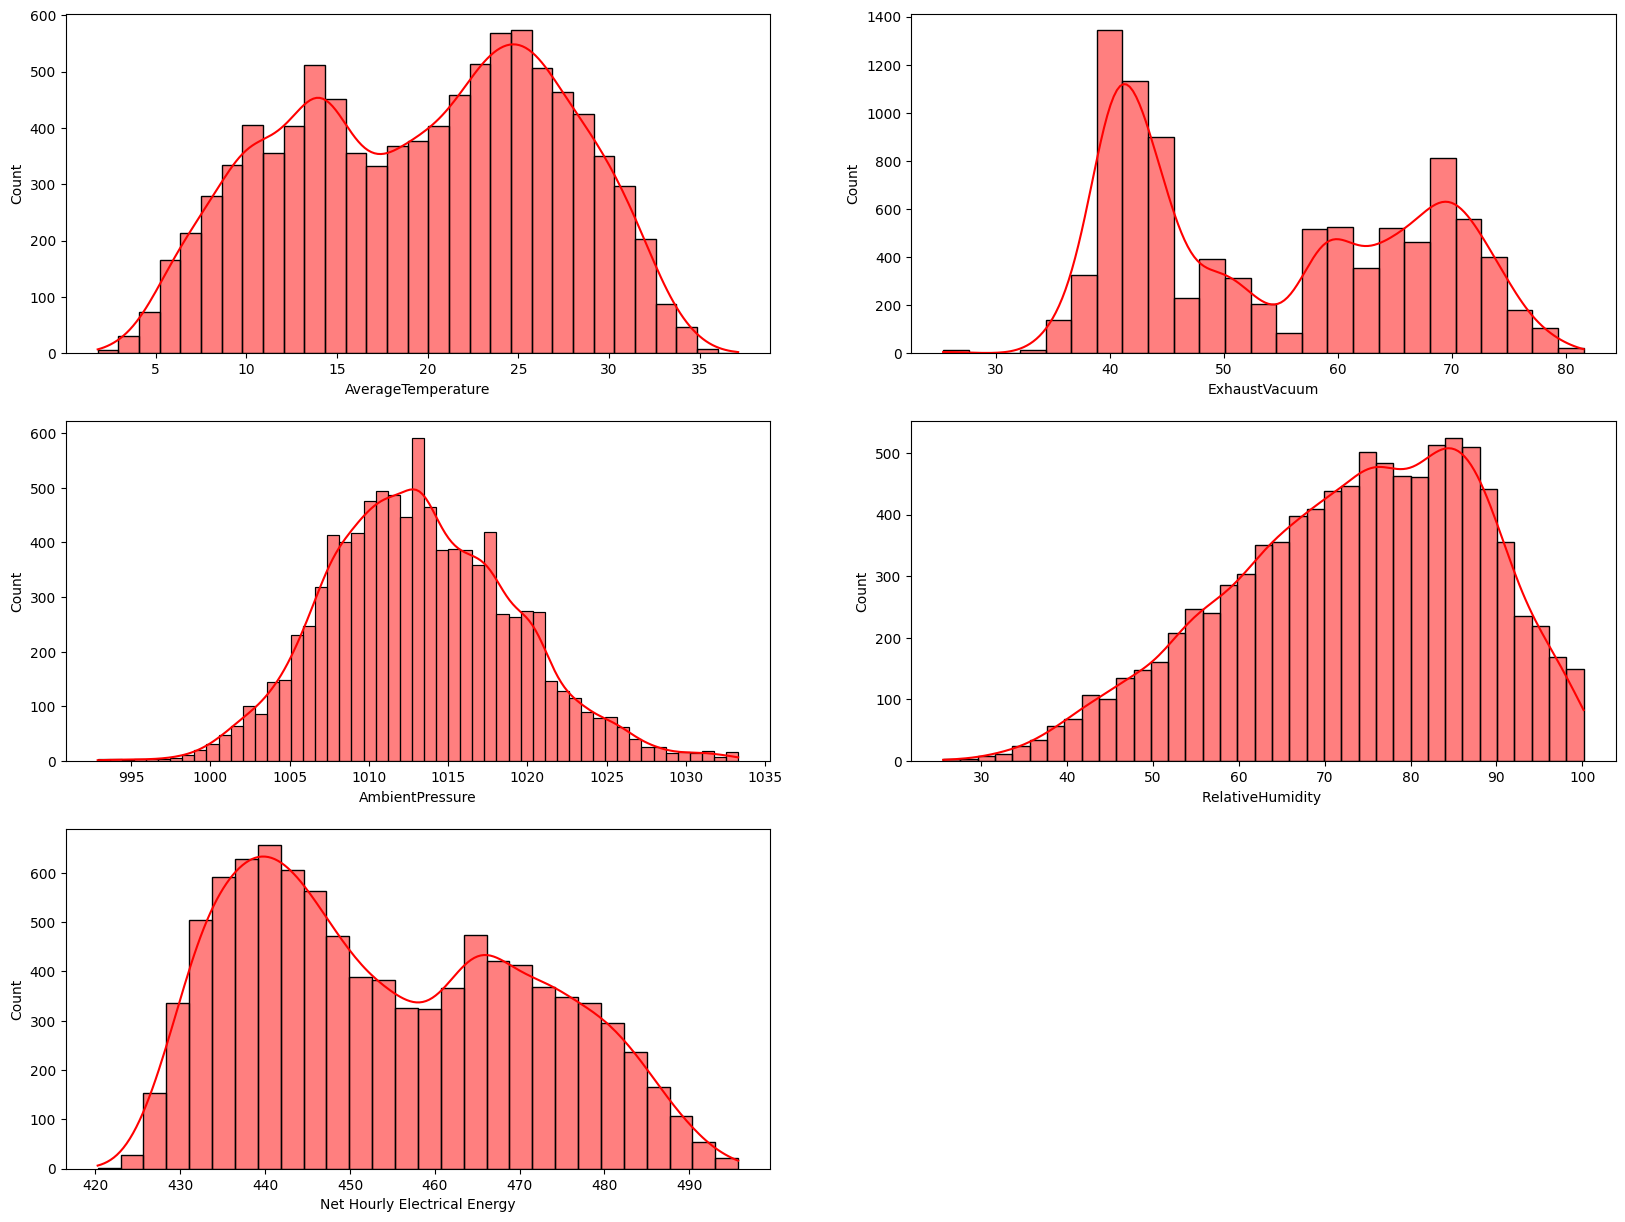

In [ ]:
plt.figure(figsize=(20,15))
j = 1
for i in data.columns:
    plt.subplot(3,2,j)
    sns.histplot(data[i], kde= True, color = "red")
    j+=1

## 3.2 PairPlot

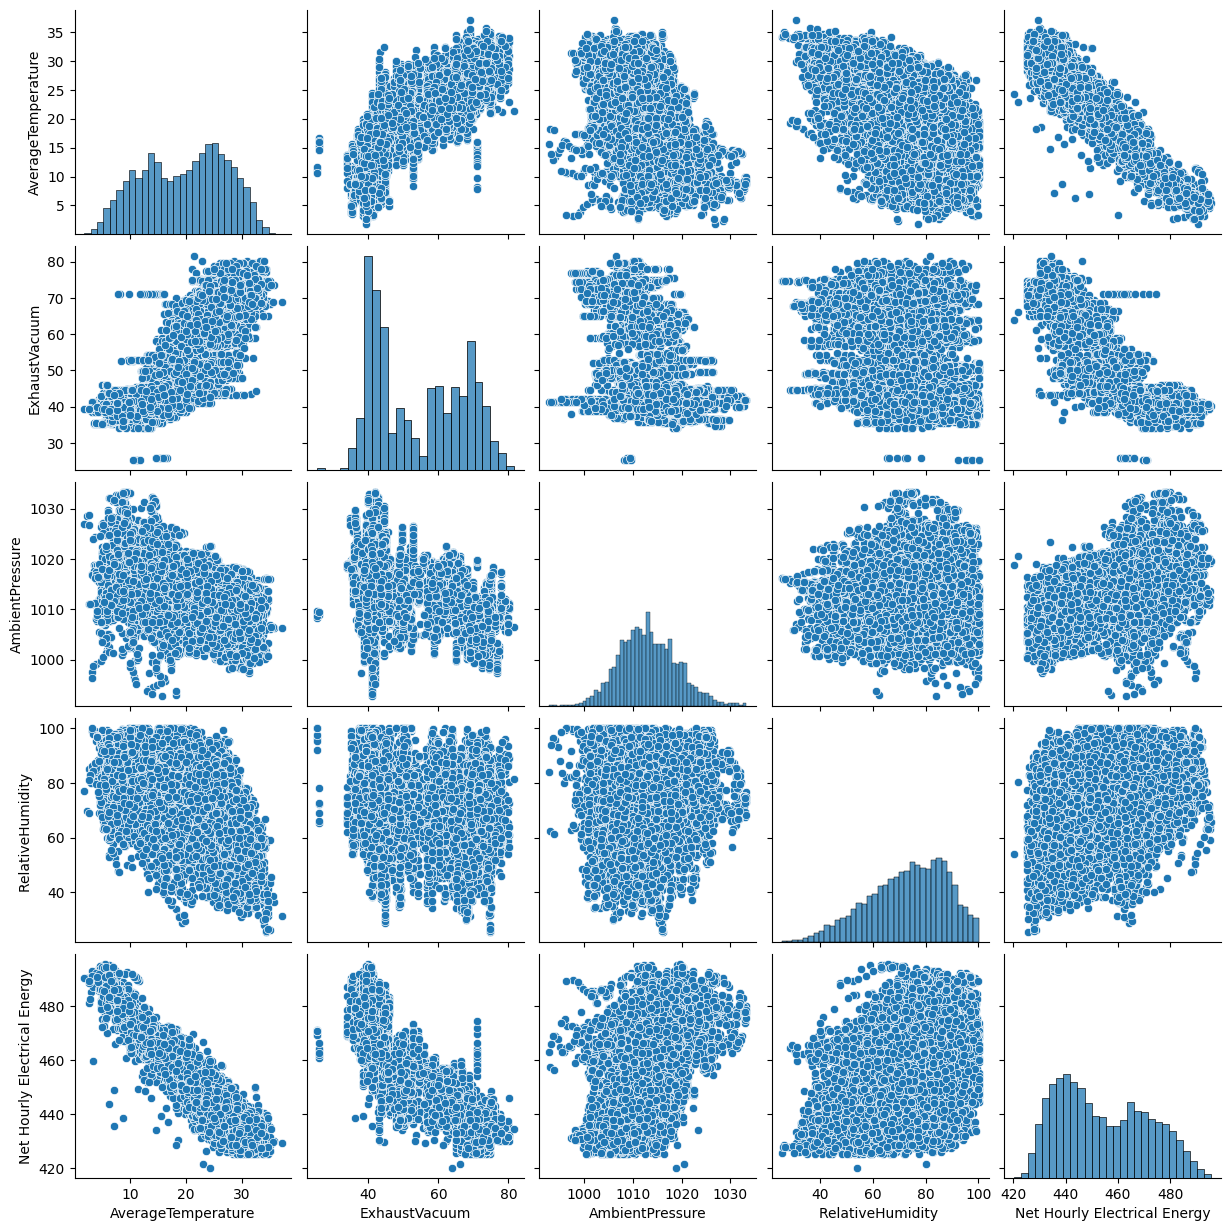

In [ ]:
sns.pairplot(data= data)

## 3.3 BoxPlot

Boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

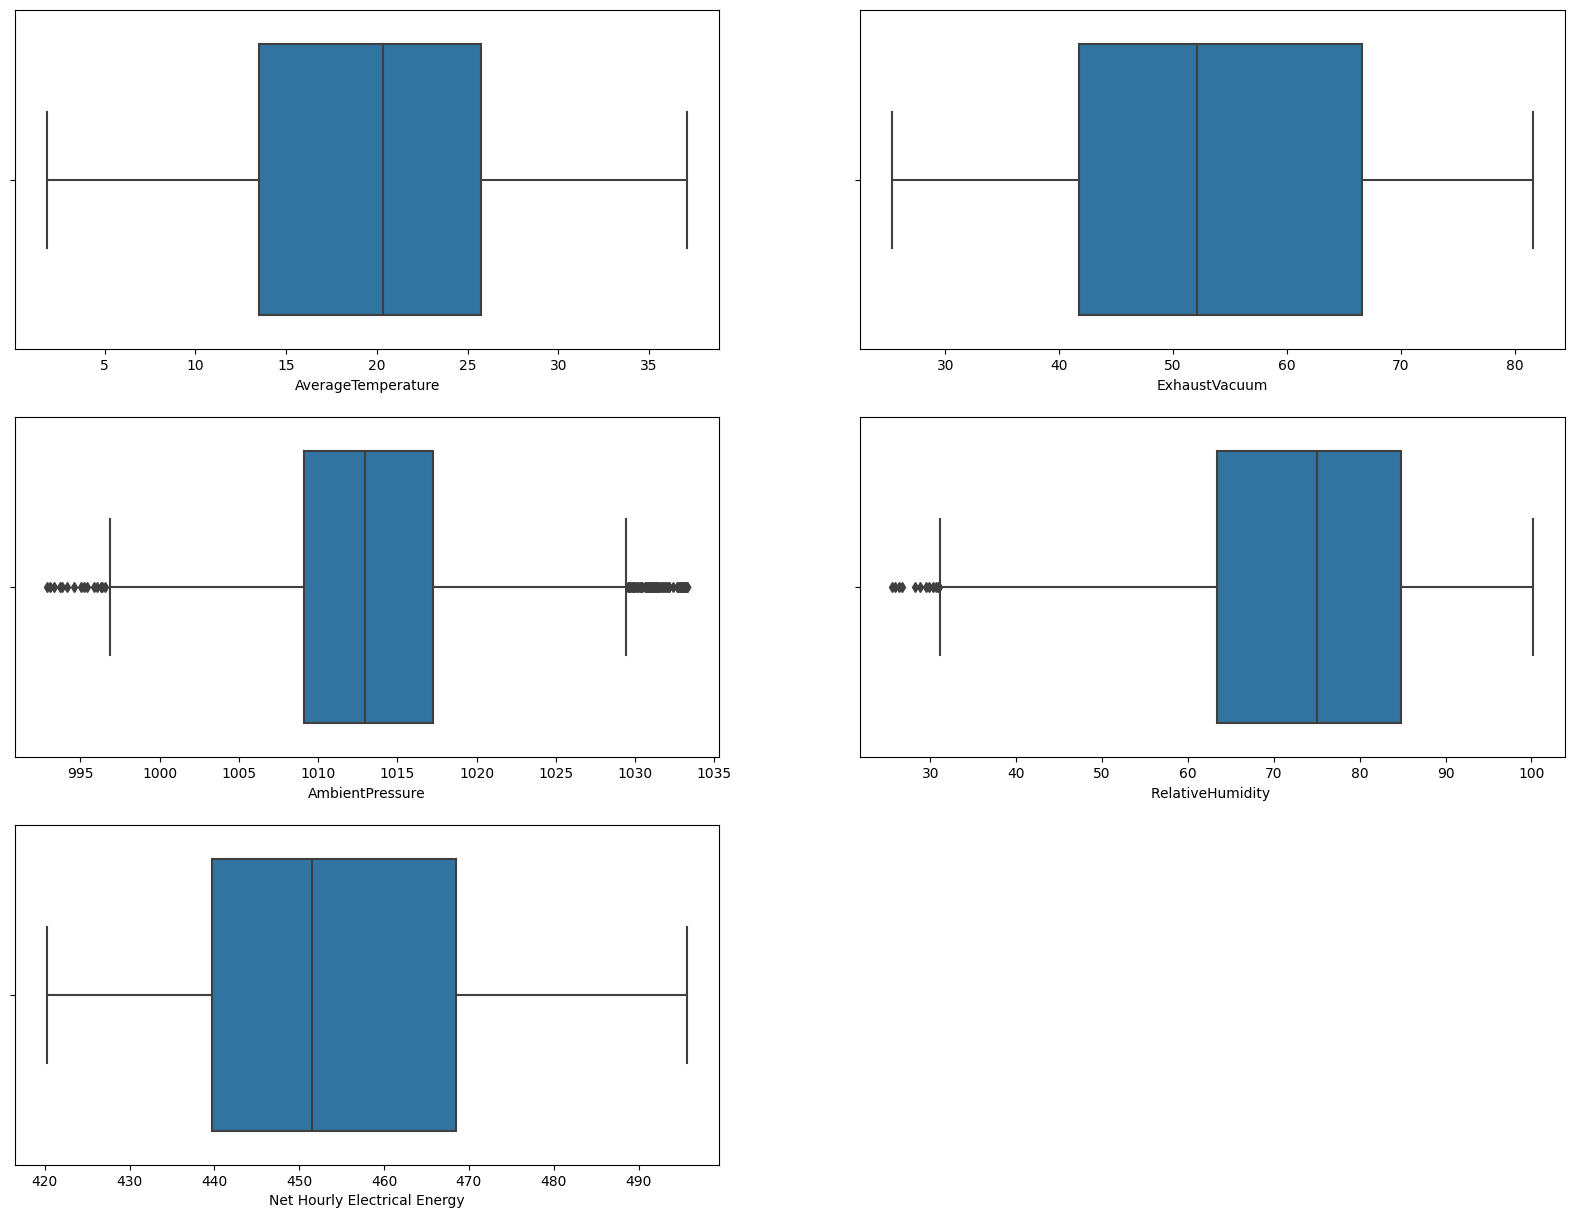

In [ ]:
plt.figure(figsize=(20,15))
j=1
for i , row in enumerate(data.columns):
  plt.subplot(3,2,j)
  sns.boxplot(x=row,data=data)
  j+=1

## 3.4 CorrelationPlot

`Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). Types of Correlation`

*   `Perfect Positive Correlation  1`
*   `High Positive Correlation 0.9`
*   `Low Positive Correlation 0.5 `
*   `No correlation 0`
*   `Low Negative Correlation -0.5`
*   `High Negative Correlation -0.9`
*   `Perfect Negative Correlation -1`

<Axes: >

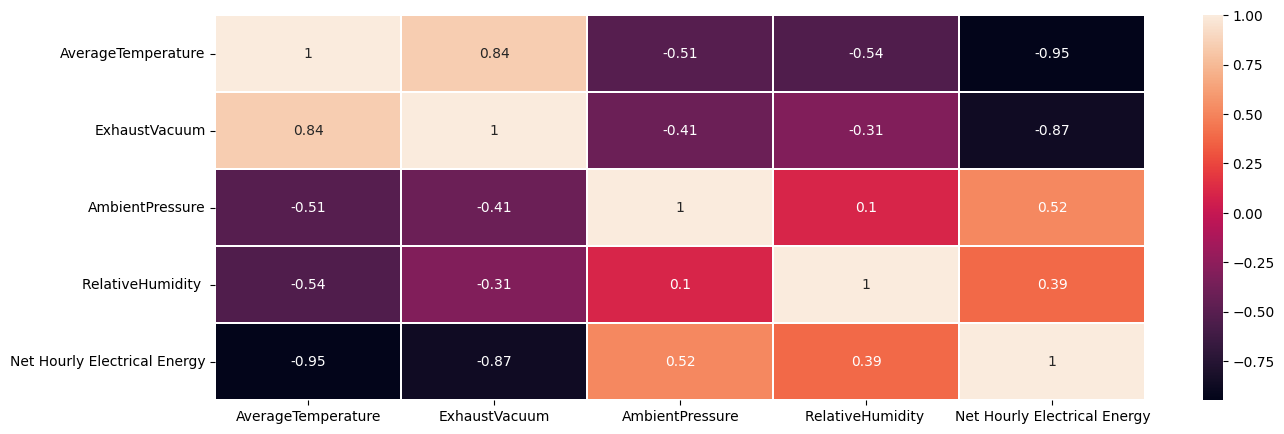

In [ ]:
plt.subplots(figsize=(15, 5))
sns.heatmap(data.corr(), linewidths=.1, annot=True)

**Summary of data visualization**

*   We can see that variables `"Ambient Pressure"` and `"Relativity Humidity"` contain outliers 

*  We can see from the correlation graphic that 
    - `"Net Hourly Electrical Energy"` has a high negative correlation with `"Average Temperature"` and `"Exhaust Vacuum"`
    - `"Net Hourly Electrical Energy"` has a low positive correlation with `"AmbientPressure" `


# 4. **Preparing Data for the Model**

## 4.1 Splitting data
The goal of this work is predict to predict the `"Net hourly electrical energy(EP)"` of the plant, to do that we need to split the data into inputs(independent variable)  `["Average Temperature", "Exhaust Vacuum", "Ambient Pressure", "Relative Humidity"]` and  output(dependent variable) `"Net hourly electrical energy"`

In [ ]:
# Decompose data into inputs and outputs
# ==============================================================================
X = data.drop(["Net Hourly Electrical Energy"], axis =1)
y = data["Net Hourly Electrical Energy"]

# Method Hold out
# ==============================================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(X_train.shape)                                                            #Dataset to create of the model
print(X_test.shape)                                                             #Dataset to evaluate the performance of the model
print(y_train.shape)                              
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


## 4.2 Standardizating Data

When we analyze data, we deal with datasets whose features vary in magnitude and units. In this case, we are dealing with variables as `"Average Temperature"` measured in Celcius and `"Ambient Pressure"` measured in bar. By applying machine learning techniques to these variables, the algorithm will consider the variable `"Ambient Pressure"` more dominant than `"Average Temperature"`, due to the huge numeric difference present themselves. Thus, for this case, we need that all variables contribute equally to the analysis, i.e., our variables to lie in the same range, in this case, (0-1). Standardization is a method that performs this task.

In [ ]:
# Import  Library
# ==============================================================================
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# **5.  Machine Learning Model**

## 5.1 Regression with a deep neural network (DNN)

### Import Libraries

In [ ]:
# Import libraries
# ==============================================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

### Construct the Neural Network

In [ ]:
# Construct the Neural Network
# ==============================================================================
model= Sequential([                                                             # Initializing the ANN
                    Dense(units=32, activation="relu"),                         # Adding First Hidden Layer
                    Dense(units=1)                                              # Adding Output Layer
])
#If we make a regression with neural networks, we do not need to add an activation function compared to classification problems


### Compile the Model

In [ ]:
# Compile the model
# There are two function roles that you should be aware of though and these are loss functions and optimizers.
# ==============================================================================
model.compile(optimizer="adam",loss="mean_squared_error")

### Training the Model

In [ ]:
# To start training, call the model.fit
# ==============================================================================
history = model.fit(
          X_train,
          y_train, 
          validation_data = (X_test, y_test), 
          epochs=80,                                                            #The total number of iterations of all the training data in one cycle for training the machine learning model
          batch_size = 32
          )

Epoch 1/80
240/240 [==============================] - 4s 8ms/step - loss: 204680.1875 - val_loss: 201475.3594
Epoch 2/80
240/240 [==============================] - 1s 4ms/step - loss: 196085.0469 - val_loss: 188924.8125
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 179583.0000 - val_loss: 169029.2500
Epoch 4/80
240/240 [==============================] - 1s 2ms/step - loss: 157210.8906 - val_loss: 144693.9531
Epoch 5/80
240/240 [==============================] - 1s 2ms/step - loss: 131540.0312 - val_loss: 118253.4453
Epoch 6/80
240/240 [==============================] - 1s 2ms/step - loss: 105198.1328 - val_loss: 92779.6875
Epoch 7/80
240/240 [==============================] - 1s 2ms/step - loss: 81371.9766 - val_loss: 70984.6875
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 61842.3047 - val_loss: 53833.6641
Epoch 9/80
240/240 [==============================] - 1s 3ms/step - loss: 47008.0859 - val_loss: 41209.4336
Epoch 10/80
240/2

### Visualize the model's training progress

In [ ]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,204680.187500,201475.359375
1,196085.046875,188924.812500
2,179583.000000,169029.250000
3,157210.890625,144693.953125
4,131540.031250,118253.445312
...,...,...
75,18.292179,17.047665
76,18.219847,17.424257
77,18.318913,17.105398
78,18.256611,17.110161


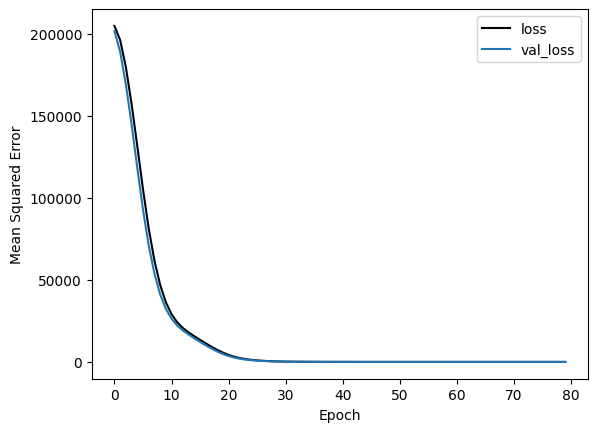

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss', color = "black")
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.legend()
plot_loss(history)

As seen in the figure above, our nueral network model performs very well.

### Predictions

In [ ]:
predictions = model.predict(X_test)
print(predictions)

60/60 [==============================] - 0s 1ms/step
[[435.12994]
 [435.46713]
 [460.07037]
 ...
 [467.5078 ]
 [431.99274]
 [456.01337]]


### Diagnosis of residues

60/60 [==============================] - 0s 2ms/step


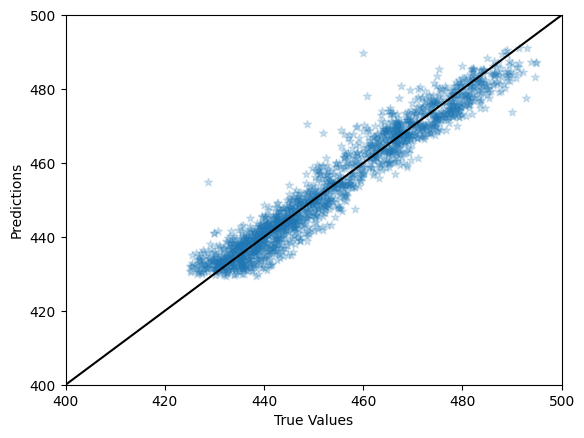

In [ ]:
predictions = model.predict(X_test).flatten()

plt.scatter(y_test, predictions, marker = "*", alpha=0.2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [400, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims , color= "black")

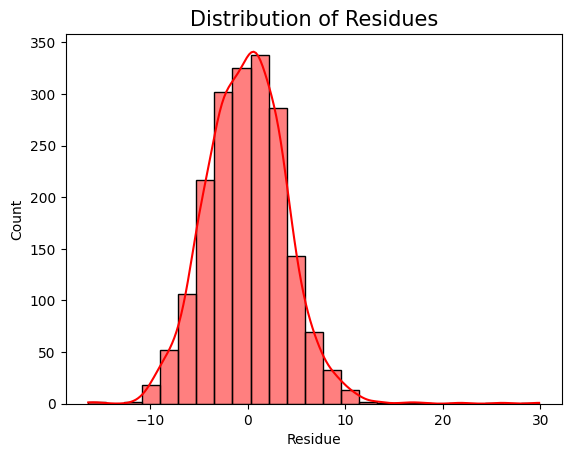

In [ ]:
# ==============================================================================
error = predictions - y_test
sns.histplot(error, bins=25, kde= True , color = "red")
plt.xlabel('Residue')
plt.title("Distribution of Residues", fontsize = 15)
_ = plt.ylabel('Count')

# **6. Results and Conclusions**

The aim of this project was to estimate `"Net hourly electrical energy"` from `["Average Temperature", "Exhaust Vacuum", "Ambient Pressure", and "Relative Humidity"]`, to do that we have employed a model of regression using a deep neural network (DNN). The report of the model is the following


* The Mean Squared Error of the test is equal to 16.96, that is, our predictions go away an average of 16.96 units from the real value.

*  The learning curves, loss training and loss validation, show that our model 
does not present an overfitting problem, a common problem present in DNN.

* The Diagnosis of residues shows that
     * The distribution of residues is spread out in a symmetric form around the straight line.
     * The residues present a distribution very similar to a normal distribution, which is a good sign that our model is predicting reasonably well.



# **7.  References**

    https://scikit-learn.org/0.21/_downloads/scikit-learn-docs.pdf
    https://www.tensorflow.org/tutorials/keras/regression
    https://www.kaggle.com/datasets/gova26/airpressure